In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

In [27]:
df=pd.read_csv('ToneAnalyzer.csv')

In [28]:
df.head()

,Unnamed: 0,usernameTweet,text,nbr_retweet,nbr_favorite,nbr_reply,datetime,is_reply,is_retweet,joy,analytical,sadness,confident,tentative,fear,anger
0,0,Naveens27368191,DIPR COVID19 KarnatakaDIPR MigrantKA I h...,0,1,2,2020-05-06 14:58:38,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,wenagrutas,Oh They deserve it because are working hard a...,1,3,0,2020-05-27 17:22:38,True,False,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2,YouthSefton,Everyone is going to find the current Covid19 ...,7,4,0,2020-06-11 17:06:08,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,DemuxAcademy,Do you always tend to get clumsy in an awkward...,1,0,0,2020-05-13 12:00:02,False,False,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,4,perezlevi,Of course time slot matters but substitutes le...,0,0,0,2020-05-31 00:02:25,True,False,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df = df.replace(to_replace =np.nan, 
                 value =False)
df = df.replace(to_replace =1, 
                 value =True)

In [30]:
df.head()

,Unnamed: 0,usernameTweet,text,nbr_retweet,nbr_favorite,nbr_reply,datetime,is_reply,is_retweet,joy,analytical,sadness,confident,tentative,fear,anger
0,0,Naveens27368191,DIPR COVID19 KarnatakaDIPR MigrantKA I h...,0,True,2,2020-05-06 14:58:38,False,False,False,False,False,False,False,False,False
1,True,wenagrutas,Oh They deserve it because are working hard a...,True,3,0,2020-05-27 17:22:38,True,False,True,False,False,False,False,False,False
2,2,YouthSefton,Everyone is going to find the current Covid19 ...,7,4,0,2020-06-11 17:06:08,False,False,False,False,False,False,False,False,False
3,3,DemuxAcademy,Do you always tend to get clumsy in an awkward...,True,0,0,2020-05-13 12:00:02,False,False,False,True,False,False,False,False,False
4,4,perezlevi,Of course time slot matters but substitutes le...,0,0,0,2020-05-31 00:02:25,True,False,True,False,False,False,False,False,False


In [31]:
Emotions = {'Joy':sum(df.joy),
            'Analytical':sum(df.analytical),
            'Sadness':sum(df.sadness),
            'Confident':sum(df.confident),
            'Tentative':sum(df.tentative),
            'Fear':sum(df.fear),
            'Anger':sum(df.anger),
            'Unemotional':df.shape[0]-sum(df.joy)-sum(df.analytical)-sum(df.sadness)
            -sum(df.confident)-sum(df.tentative)-sum(df.fear)-sum(df.anger)
           }

In [32]:
emotions=pd.DataFrame(list(Emotions.items()),columns = ['Emotions','Count'])
for i in range(0,emotions.shape[0]):
    emotions['Percentage'] = emotions['Count'].apply(lambda x: x/df.shape[0]*100)

emotions

,Emotions,Count,Percentage
0,Joy,1241,14.262728
1,Analytical,2637,30.306861
2,Sadness,1322,15.193656
3,Confident,491,5.643030
4,Tentative,629,7.229054
5,Fear,171,1.965291
6,Anger,150,1.723940
7,Unemotional,2060,23.675440


In [33]:
emotions.to_csv('EmotionsvsCount.csv')

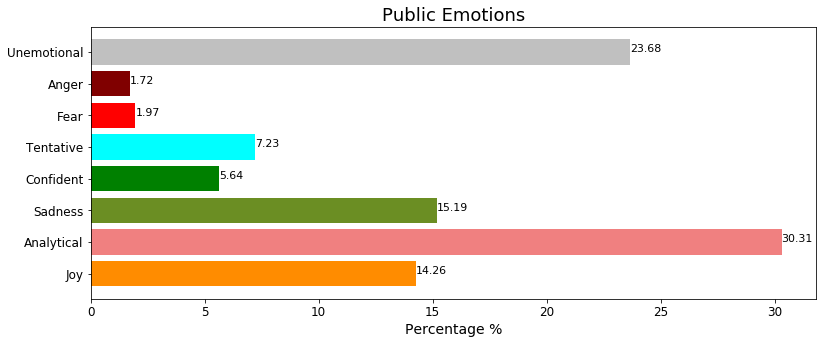

In [34]:
# Plotting Various Emotions

plt.figure(figsize=(13,5))
plt.barh(emotions.Emotions, emotions.Percentage,color=['darkorange', 'lightcoral', 'olivedrab', 'green', 'cyan', 'red','maroon','silver'])
plt.xlabel('Percentage %',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Public Emotions',fontsize=18)
for index, value in enumerate(round(emotions.Percentage,2)):
    plt.text(value, index, str(value),fontsize=11)
plt.savefig('Public Emotions.jpg')

In [35]:
df = df.replace(to_replace =True, 
                 value =1.0)
df['datetime']=pd.to_datetime(df.datetime)
df['Week'] = df['datetime'].dt.week
df.sort_values(by=['Week'],inplace=True)
# df=df.reset_index()
df.head()

,Unnamed: 0,usernameTweet,text,nbr_retweet,nbr_favorite,nbr_reply,datetime,is_reply,is_retweet,joy,analytical,sadness,confident,tentative,fear,anger,Week
1928,1928.0,kshitijrvyas,CitImmCanada my mother is on Visitor Visa a...,0.0,0.0,1.0,2020-03-14 05:20:00,1.0,False,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11
6233,6233.0,pharmacistkolar,Awareness regarding coronavirus disease COVID...,1.0,3.0,2.0,2020-03-09 23:42:00,0.0,False,0.0,1.0,0.0,1.0,0.0,0.0,0.0,11
4822,4822.0,chotalia_vruta,FlyWideroe Do I still not get refund or ext...,0.0,0.0,2.0,2020-03-11 21:32:00,0.0,False,0.0,1.0,1.0,0.0,0.0,0.0,0.0,11
7036,7036.0,sagarkulkx,UAEembassyIndia Amid COVID 19 Crisis situ...,1.0,1.0,2.0,2020-03-13 11:02:00,0.0,False,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11
3748,3748.0,DevashreeKB,In the current COVID 19 scenario extension...,1.0,0.0,1.0,2020-03-13 20:26:00,1.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11


In [49]:
sentimentVariation=pd.DataFrame()

In [50]:
joy=df.joy.groupby(df.Week).agg(np.mean)
analytical =df.analytical.groupby(df.Week).agg(np.mean)
sadness=df.sadness.groupby(df.Week).agg(np.mean)
confident=df.confident.groupby(df.Week).agg(np.mean)
tentative=df.tentative.groupby(df.Week).agg(np.mean)
fear=df.fear.groupby(df.Week).agg(np.mean)
anger=df.anger.groupby(df.Week).agg(np.mean)

In [51]:
sentimentVariation['Joy']=joy
sentimentVariation['Analytical']=analytical
sentimentVariation['Sadness']=sadness
sentimentVariation['Confident']=confident
sentimentVariation['Tentative']=tentative
sentimentVariation['Fear']=fear
sentimentVariation['Anger']=anger

In [52]:
sentimentVariation

,Joy,Analytical,Sadness,Confident,Tentative,Fear,Anger
Week,,,,,,,
11,0.000000,0.600000,0.200000,0.200000,0.000000,0.000000,0.200000
12,0.000000,0.300000,0.200000,0.000000,0.000000,0.000000,0.100000
13,0.071429,0.571429,0.214286,0.000000,0.107143,0.000000,0.000000
14,0.104167,0.583333,0.125000,0.104167,0.062500,0.020833,0.000000
15,0.107345,0.553672,0.169492,0.084746,0.050847,0.022599,0.011299
16,0.125693,0.314233,0.116451,0.040665,0.160813,0.005545,0.014787
17,0.111111,0.240741,0.092593,0.009259,0.055556,0.009259,0.009259
18,0.149351,0.262987,0.113636,0.029221,0.074675,0.009740,0.012987
19,0.135181,0.293031,0.160369,0.071369,0.061293,0.024349,0.017632


In [53]:
sentimentVariation.reset_index(level=0, inplace=True)

In [54]:
sentimentVariation

,Week,Joy,Analytical,Sadness,Confident,Tentative,Fear,Anger
0,11,0.000000,0.600000,0.200000,0.200000,0.000000,0.000000,0.200000
1,12,0.000000,0.300000,0.200000,0.000000,0.000000,0.000000,0.100000
2,13,0.071429,0.571429,0.214286,0.000000,0.107143,0.000000,0.000000
3,14,0.104167,0.583333,0.125000,0.104167,0.062500,0.020833,0.000000
4,15,0.107345,0.553672,0.169492,0.084746,0.050847,0.022599,0.011299
5,16,0.125693,0.314233,0.116451,0.040665,0.160813,0.005545,0.014787
6,17,0.111111,0.240741,0.092593,0.009259,0.055556,0.009259,0.009259
7,18,0.149351,0.262987,0.113636,0.029221,0.074675,0.009740,0.012987
8,19,0.135181,0.293031,0.160369,0.071369,0.061293,0.024349,0.017632
9,20,0.179837,0.307902,0.152589,0.053134,0.079019,0.023161,0.009537


In [55]:
import datetime
import time


def getDateRangeFromWeek(p_year,p_week):

    firstdayofweek = datetime.datetime.strptime(f'{p_year}-W{int(p_week )- 1}-1', "%Y-W%W-%w").date()
    lastdayofweek = firstdayofweek + datetime.timedelta(days=6.9)
    return str(firstdayofweek) +' - '+ str(lastdayofweek)


#Call function to get dates range 
sentimentVariation['WeekRange']=sentimentVariation['Week'].apply(lambda x: getDateRangeFromWeek(2020,x))

def adjustWeekRange(text):
    text =text.replace('2020-','')
    return text

sentimentVariation['WeekRange'] = sentimentVariation['WeekRange'].apply(lambda x: adjustWeekRange(x))

def adjustWeekRange2(text):
    text =text.replace('03-','Mar')
    text =text.replace('04-','Apr')
    text =text.replace('05-','May')
    text =text.replace('06-','Jun')
    return text

sentimentVariation['WeekRange'] = sentimentVariation['WeekRange'].apply(lambda x: adjustWeekRange2(x))

In [56]:
sentimentVariation

,Week,Joy,Analytical,Sadness,Confident,Tentative,Fear,Anger,WeekRange
0,11,0.000000,0.600000,0.200000,0.200000,0.000000,0.000000,0.200000,Mar09 - Mar15
1,12,0.000000,0.300000,0.200000,0.000000,0.000000,0.000000,0.100000,Mar16 - Mar22
2,13,0.071429,0.571429,0.214286,0.000000,0.107143,0.000000,0.000000,Mar23 - Mar29
3,14,0.104167,0.583333,0.125000,0.104167,0.062500,0.020833,0.000000,Mar30 - Apr05
4,15,0.107345,0.553672,0.169492,0.084746,0.050847,0.022599,0.011299,Apr06 - Apr12
5,16,0.125693,0.314233,0.116451,0.040665,0.160813,0.005545,0.014787,Apr13 - Apr19
6,17,0.111111,0.240741,0.092593,0.009259,0.055556,0.009259,0.009259,Apr20 - Apr26
7,18,0.149351,0.262987,0.113636,0.029221,0.074675,0.009740,0.012987,Apr27 - May03
8,19,0.135181,0.293031,0.160369,0.071369,0.061293,0.024349,0.017632,May04 - May10
9,20,0.179837,0.307902,0.152589,0.053134,0.079019,0.023161,0.009537,May11 - May17


In [57]:
sentimentVariation['Joy']=sentimentVariation['Joy'].apply(lambda x: x*100)
sentimentVariation['Analytical']=sentimentVariation['Analytical'].apply(lambda x: x*100)
sentimentVariation['Sadness']=sentimentVariation['Sadness'].apply(lambda x: x*100)
sentimentVariation['Confident']=sentimentVariation['Confident'].apply(lambda x: x*100)
sentimentVariation['Tentative']=sentimentVariation['Tentative'].apply(lambda x: x*100)
sentimentVariation['Fear']=sentimentVariation['Fear'].apply(lambda x: x*100)
sentimentVariation['Anger']=sentimentVariation['Anger'].apply(lambda x: x*100)

In [59]:
sentimentVariation=sentimentVariation[['Week', 'WeekRange', 'Joy', 'Analytical', 'Sadness', 'Confident', 'Tentative',
       'Fear', 'Anger']]

In [60]:
sentimentVariation

,Week,WeekRange,Joy,Analytical,Sadness,Confident,Tentative,Fear,Anger
0,11,Mar09 - Mar15,0.000000,60.000000,20.000000,20.000000,0.000000,0.000000,20.000000
1,12,Mar16 - Mar22,0.000000,30.000000,20.000000,0.000000,0.000000,0.000000,10.000000
2,13,Mar23 - Mar29,7.142857,57.142857,21.428571,0.000000,10.714286,0.000000,0.000000
3,14,Mar30 - Apr05,10.416667,58.333333,12.500000,10.416667,6.250000,2.083333,0.000000
4,15,Apr06 - Apr12,10.734463,55.367232,16.949153,8.474576,5.084746,2.259887,1.129944
5,16,Apr13 - Apr19,12.569316,31.423290,11.645102,4.066543,16.081331,0.554529,1.478743
6,17,Apr20 - Apr26,11.111111,24.074074,9.259259,0.925926,5.555556,0.925926,0.925926
7,18,Apr27 - May03,14.935065,26.298701,11.363636,2.922078,7.467532,0.974026,1.298701
8,19,May04 - May10,13.518052,29.303107,16.036944,7.136860,6.129303,2.434929,1.763224
9,20,May11 - May17,17.983651,30.790191,15.258856,5.313351,7.901907,2.316076,0.953678


In [61]:
sentimentVariation.to_csv('EmotionsvsWeeks.csv')

In [62]:
sentimentVariation

,Week,WeekRange,Joy,Analytical,Sadness,Confident,Tentative,Fear,Anger
0,11,Mar09 - Mar15,0.000000,60.000000,20.000000,20.000000,0.000000,0.000000,20.000000
1,12,Mar16 - Mar22,0.000000,30.000000,20.000000,0.000000,0.000000,0.000000,10.000000
2,13,Mar23 - Mar29,7.142857,57.142857,21.428571,0.000000,10.714286,0.000000,0.000000
3,14,Mar30 - Apr05,10.416667,58.333333,12.500000,10.416667,6.250000,2.083333,0.000000
4,15,Apr06 - Apr12,10.734463,55.367232,16.949153,8.474576,5.084746,2.259887,1.129944
5,16,Apr13 - Apr19,12.569316,31.423290,11.645102,4.066543,16.081331,0.554529,1.478743
6,17,Apr20 - Apr26,11.111111,24.074074,9.259259,0.925926,5.555556,0.925926,0.925926
7,18,Apr27 - May03,14.935065,26.298701,11.363636,2.922078,7.467532,0.974026,1.298701
8,19,May04 - May10,13.518052,29.303107,16.036944,7.136860,6.129303,2.434929,1.763224
9,20,May11 - May17,17.983651,30.790191,15.258856,5.313351,7.901907,2.316076,0.953678
